## Лабораторная работа 8
### Двумерные начально-краевые задачи для дифференциального уравнения параболического типа

Сорокин Никита, М8О-403Б-20

### Задание

Используя схемы переменных направлений и дробных шагов, решить двумерную начально-краевую задачу для дифференциального уравнения параболического типа. В различные моменты времени вычислить погрешность численного решения путем сравнения результатов с приведенным в задании аналитическим решением $U(x, y, t)$.

Вариант 1.

$$

\begin{cases}

\frac{\partial u}{\partial t} = a\frac{\partial^2 u}{\partial x^2} + a\frac{\partial^2 u}{\partial y^2} , ~~~ a > 0 \\[6pt]

u(0, y, t) = cos(\mu_2 y) exp(-(\mu_1^2+\mu_2^2)at) \\
u(\frac{\pi}{2} \mu_1, y, t) = 0 \\
u(x, 0, t) = cos(\mu_1x) exp(-(\mu_1^2+\mu_2^2)at) \\
u(x, \frac{\pi}{2} \mu_2, t) = 0 \\
u(x, y, 0) = cos(\mu_1x)cos(\mu_2y)

\end{cases}

$$

Аналитическое решение: 

$$
U(x, y, t) = cos(\mu_1x)cos(\mu_2y)exp(-(\mu_1^2+\mu_2^2)at)
$$


In [1]:
import sys 
sys.path

sys.path.insert(0, r"c:\Users\никита\Desktop\учеба\чм\modules")

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import time
sns.set()

%matplotlib widget

plt.rcParams["figure.figsize"] = (10, 6)

import LinearAlgebra

In [3]:
x_begin = 0
x_end = lambda mu_1: np.pi * mu_1 / 2

y_begin = 0
y_end = lambda mu_2: np.pi * mu_2 / 2

t_begin = 0
t_end = 2

a = 1

mu = [(1, 1), (2, 1), (1, 2)] 

h_x = 0.05
h_y = 0.05
tau = 0.01

Начальные и граничные условия:

In [4]:
def phi_3(y, t, mu_1, mu_2, a=1):
    return np.cos(mu_2 * y) * np.exp(-(mu_1**2 + mu_2**2) * a * t)

def phi_4(y, t, mu_1, mu_2, a=1):
    return 0

def phi_1(x, t, mu_1, mu_2, a=1):
    return np.cos(mu_1 * x) * np.exp(-(mu_1**2 + mu_2**2) * a * t)

def phi_2(x, t, mu_1, mu_2, a=1):
    return 0

def psi(x, y, mu_1, mu_2, a=1):
    return np.cos(mu_1 * x) * np.cos(mu_2 * y)

def solution(x, y, t, mu_1, mu_2, a=1):
    return np.cos(mu_1 * x) * np.cos(mu_2 * y) * np.exp(-(mu_1**2 + mu_2**2) * a * t)

### Точное решение

In [5]:
def get_analytical_solution(x_begin, x_end, y_begin, y_end, t_begin, t_end, h_x, h_y, tau, mu_1, mu_2):

    x = np.arange(x_begin, x_end(mu_1) + h_x, h_x)
    y = np.arange(y_begin, y_end(mu_2) + h_y, h_y)
    t = np.arange(t_begin, t_end + tau, tau)

    u = np.zeros((x.size, y.size, t.size))
    for i in range(x.size):
        for j in range(y.size):
            for k in range(t.size):
                u[i, j, k] = solution(x[i], y[j], t[k], mu_1, mu_2)
    
    return u

In [6]:
mu_1, mu_2 = mu[0]

u_exact = get_analytical_solution(x_begin, x_end, y_begin, y_end, t_begin, t_end, h_x, h_y, tau, mu_1, mu_2)

### Метод переменных направлений

Для момента времени $k+1/2$ производная по $ x $ апроксимруется неявно, а по $ y $ - явно. Для момента времени $ k+1 $ наоборот.

#### Шаг 1.

Решаем систему уравнений для всех $j$, чтобы получить значения в момент времени $k+1/2$:

$$
\begin{cases}
bu_{1j}^{k+1/2}+cu_{2j}^{k+1/2}=d_1, 
\\
au_{i-1j}^{k+1/2}+bu_{ij}^{k+1/2}+cu_{i+1j}^{k+1/2}=d_i \, , ~~~i=2\dots N-2,
\\
au_{N-2j}^{k+1/2}+bu_{N-1j}^{k+1/2}=d_{N-1},
\end{cases}
$$


$$

\begin{align}
a &=c=-a\tau h_y^2 \\
b_j &=2h_x^2h_y^2 + 2a\tau h_y^2 \\
d_i &= a\tau h_x^2 u_{ij-1}^k+(2h_x^2h_y^2 - 2a\tau h_x^2)u_{ij}^k+a\tau h_x^2u_{ij+1}^k \\
d_1 &= d - au_{0j}^{k+1/2} \\
d_{N-1} &=d - cu_{Nj}^{k+1/2} 
\end{align}

$$

#### Шаг 2.

Решаем систему уравнений для всех $i$, чтобы получить значения в момент времени $k+1$:

$$
\begin{cases}
bu_{1j}^{k+1}+cu_{2j}^{k+1}=d_1, 
\\
au_{i-1j}^{k+1}+bu_{ij}^{k+1}+cu_{i+1j}^{k+1}=d_i \, , ~~~i=2\dots N-2,
\\
au_{N-2j}^{k+1}+bu_{N-1j}^{k+1}=d_{N-1},
\end{cases}
$$

$$
\begin{align}

a &=c=-a\tau h_x^2 \\
b_j &=2h_x^2h_y^2 + 2a\tau h_x^2 \\
d_i &= a\tau h_y^2 u_{i-1j}^{k+1/2}+(2h_x^2h_y^2 - 2a\tau h_y^2)u_{ij}^{k+1/2}+a\tau h_y^2u_{i+1j}^{k+1/2} \\
d_1 &=d - au_{i0}^{k+1} \\
d_{N-1} &=d - cu_{iN}^{k+1} \\

\end{align}

$$


In [9]:
def alternating_directions_scheme(x_begin, x_end, y_begin, y_end, t_begin, t_end,
                                  h_x, h_y, tau, mu_1, mu_2, a=1):
                                 
    x = np.arange(x_begin, x_end(mu_1) + h_x, h_x)
    y = np.arange(y_begin, y_end(mu_2) + h_y, h_y)
    t = np.arange(t_begin, t_end + tau, tau)

    u = np.zeros((x.size, y.size, t.size))
    
    for i in range(x.size):
        for j in range(y.size):
            u[i, j, 0] = psi(x[i], y[j], mu_1, mu_2)

    for k in range(1, t.size):

        u[:, 0, k] = phi_1(x, t[k], mu_1, mu_2)
        u[:, -1, k] = phi_2(x, t[k], mu_1, mu_2)
        u[0, :, k] = phi_3(y, t[k], mu_1, mu_2)
        u[-1, :, k] = phi_4(y, t[k], mu_1, mu_2)

        u_half = np.zeros((x.size, y.size))
        
        u_half[:, 0] = phi_1(x, t[k] - tau / 2, mu_1, mu_2)
        u_half[:, -1] = phi_2(x, t[k] - tau / 2, mu_1, mu_2)
        u_half[0, :] = phi_3(y, t[k] - tau / 2, mu_1, mu_2)
        u_half[-1, :] = phi_4(y, t[k] - tau / 2, mu_1, mu_2)

        for j in range(1, y.size - 1):
            A = np.zeros((x.size - 2, x.size - 2))
            b = np.zeros((x.size - 2))

            A[0, 0] = 2 * h_x**2 * h_y**2 + 2 * a * tau * h_y**2
            A[0, 1] = -a * tau * h_y**2
            for ind in range(1, x.size - 3):
                A[ind, ind - 1] = -a * tau * h_y**2
                A[ind, ind] = 2 * h_x**2 * h_y**2 + 2 * a * tau * h_y**2
                A[ind, ind + 1] = -a * tau * h_y**2
            A[-1, -2] = -a * tau * h_y**2
            A[-1, -1] = 2 * h_x**2 * h_y**2 + 2 * a * tau * h_y**2

            for i in range(1, x.size - 1):
                b[i - 1] = (
                    u[i, j - 1, k - 1] * a * tau * h_x**2
                    + u[i, j, k - 1] * (2 * h_x**2 * h_y**2 - 2 * a * tau * h_x**2)
                    + u[i, j + 1, k - 1] * a * tau * h_x**2
                )
            b[0] -= (-a * tau * h_y**2) * phi_3(y[j], t[k] - tau / 2, mu_1, mu_2)
            b[-1] -= (-a * tau * h_y**2) * phi_4(y[j], t[k] - tau / 2, mu_1, mu_2)

            u_half[1:-1, j] = LinearAlgebra.sweep_method(A, b)

        for i in range(1, x.size - 1):
            A = np.zeros((y.size - 2, y.size - 2))
            b = np.zeros((y.size - 2))

            A[0, 0] = 2 * h_x**2 * h_y**2 + 2 * a * tau * h_x**2
            A[0, 1] = -a * tau * h_x**2
            for ind in range(1, y.size - 3):
                A[ind, ind - 1] = -a * tau * h_x**2
                A[ind, ind] = 2 * h_x**2 * h_y**2 + 2 * a * tau * h_x**2
                A[ind, ind + 1] = -a * tau * h_x**2
            A[-1, -2] = -a * tau * h_x**2
            A[-1, -1] = 2 * h_x**2 * h_y**2 + 2 * a * tau * h_x**2

            for j in range(1, y.size - 1):
                b[j - 1] = (
                    u_half[i - 1, j] * a * tau * h_y**2
                    + u_half[i, j] * (2 * h_x**2 * h_y**2 - 2 * a * tau * h_y**2)
                    + u_half[i + 1, j] * a * tau * h_y**2
                )
            b[0] -= (-a * tau * h_x**2) * phi_1(x[i], t[k], mu_1, mu_2)
            b[-1] -= (-a * tau * h_x**2) * phi_2(x[i], t[k], mu_1, mu_2)

            u[i, 1:-1, k] = LinearAlgebra.sweep_method(A, b)

    for k in range(t.size):
        u[:, 0, k] = phi_1(x, t[k], mu_1, mu_2)
        u[:, -1, k] = phi_2(x, t[k], mu_1, mu_2)
        u[0, :, k] = phi_3(y, t[k], mu_1, mu_2)
        u[-1, :, k] = phi_4(y, t[k], mu_1, mu_2)
            
    return u

In [10]:
mu_1, mu_2 = mu[0]

u_alternating = alternating_directions_scheme(x_begin, x_end, y_begin, y_end, t_begin, t_end,
                                              h_x, h_y, tau, mu_1, mu_2, a=1)

### Метод дробных шагов

Метод дробных шагов использует только неявные схемы

#### Шаг 1.

Решаем систему уравнений для всех $j$, чтобы получить значения в момент времени $k+1/2$:

$$
\begin{cases}
bu_{1j}^{k+1/2}+cu_{2j}^{k+1/2}=d_1, 
\\
au_{i-1j}^{k+1/2}+bu_{ij}^{k+1/2}+cu_{i+1j}^{k+1/2}=d, ~~~i=2\dots N-2,
\\
au_{N-2j}^{k+1/2}+bu_{N-1j}^{k+1/2}=d_{N-1},
\end{cases}
$$


$$
\begin{align}
a & = c = -a\tau \\
b_j &= h_x^2 + 2a\tau \\
d_j &= h_x^2u_{ij}^k \\
d_1 &= d_j - au_{0j}^{k+1/2} \\
d_{N-1} & = d_j - cu_{Nj}^{k+1/2} \\
\end{align}
$$

#### Шаг 2.

Решаем систему уравнений для всех $i$, чтобы получить значения в момент времени $k+1$:

$$
\begin{cases}
bu_{1j}^{k+1}+cu_{2j}^{k+1}=d_1, 
\\
au_{i-1j}^{k+1}+bu_{ij}^{k+1}+cu_{i+1j}^{k+1}=d, ~~~i=2\dots N-2,
\\
au_{N-2j}^{k+1}+bu_{N-1j}^{k+1}=d_{N-1},
\end{cases}
 $$

$$
\begin{align}
a &=c=-a\tau h_x^2 \\
b_j &=2h_x^2h_y^2 + 2a\tau h_x^2 \\
d_i &= a\tau h_y^2 u_{i-1j}^{k+1/2}+(2h_x^2h_y^2 - 2a\tau h_y^2)u_{ij}^{k+1/2}+a\tau h_y^2u_{i+1j}^{k+1/2} \\
d_1 &= d_i - au_{i0}^{k+1} \\
d_{N-1} &=d_i - cu_{iN}^{k+1} \\
\end{align}
$$

Системы будем решать методом прогонки

In [11]:
def fractional_steps_scheme(x_begin, x_end, y_begin, y_end, t_begin, t_end,
                                 h_x, h_y, tau, mu_1, mu_2, a=1):
                                 
    x = np.arange(x_begin, x_end(mu_1) + h_x, h_x)
    y = np.arange(y_begin, y_end(mu_2) + h_y, h_y)
    t = np.arange(t_begin, t_end + tau, tau)

    u = np.zeros((x.size, y.size, t.size))
    
    for i in range(x.size):
        for j in range(y.size):
            u[i, j, 0] = psi(x[i], y[j], mu_1, mu_2)

    for k in range(1, t.size):

        u_half = np.zeros((x.size, y.size))
        
        u[:, 0, k] = phi_1(x, t[k], mu_1, mu_2)
        u[:, -1, k] = phi_2(x, t[k], mu_1, mu_2)
        u[0, :, k] = phi_3(y, t[k], mu_1, mu_2)
        u[-1, :, k] = phi_4(y, t[k], mu_1, mu_2)

        u_half[:, 0] = phi_1(x, t[k] - tau / 2, mu_1, mu_2)
        u_half[:, -1] = phi_2(x, t[k] - tau / 2, mu_1, mu_2)
        u_half[0, :] = phi_3(y, t[k] - tau / 2, mu_1, mu_2)
        u_half[-1, :] = phi_4(y, t[k] - tau / 2, mu_1, mu_2)

        for j in range(1, y.size - 1):
            A = np.zeros((x.size - 2, x.size - 2))
            b = np.zeros((x.size - 2))

            A[0, 0] = h_x**2 + 2 * a * tau
            A[0, 1] = -a * tau
            for ind in range(1, x.size - 3):
                A[ind, ind - 1] = -a * tau
                A[ind, ind] = h_x**2 + 2 * a * tau
                A[ind, ind + 1] = -a * tau
            A[-1, -2] = -a * tau
            A[-1, -1] = h_x**2 + 2 * a * tau

            for i in range(1, x.size - 1):
                b[i - 1] = u[i, j, k - 1] * h_x**2
            b[0] -= (-a * tau) * phi_3(y[j], t[k] - tau / 2, mu_1, mu_2)
            b[-1] -= (-a * tau) * phi_4(y[j], t[k] - tau / 2, mu_1, mu_2)
            
            u_half[1:-1, j] = LinearAlgebra.sweep_method(A, b)
        
        for i in range(1, x.size - 1):
            A = np.zeros((y.size - 2, y.size - 2))
            b = np.zeros((y.size - 2))

            A[0, 0] = h_y**2 + 2 * a * tau
            A[0, 1] = -a * tau
            for ind in range(1, y.size - 3):
                A[ind, ind - 1] = -a * tau
                A[ind, ind] = h_y**2 + 2 * a * tau
                A[ind, ind + 1] = -a * tau
            A[-1, -2] = -a * tau
            A[-1, -1] = h_y**2 + 2 * a * tau

            for j in range(1, y.size - 1):
                b[j - 1] = u_half[i, j] * h_y**2
            b[0] -= (-a * tau) * phi_1(x[i], t[k], mu_1, mu_2)
            b[-1] -= (-a * tau) * phi_2(x[i], t[k], mu_1, mu_2)

            u[i, 1:-1, k] = LinearAlgebra.sweep_method(A, b)

        u[:, 0, k] = phi_1(x, t[k], mu_1, mu_2)
        u[:, -1, k] = phi_2(x, t[k], mu_1, mu_2)
        u[0, :, k] = phi_3(y, t[k], mu_1, mu_2)
        u[-1, :, k] = phi_4(y, t[k], mu_1, mu_2)

    return u

In [12]:
mu_1, mu_2 = mu[0]

u_fractional = fractional_steps_scheme(x_begin, x_end, y_begin, y_end, t_begin, t_end,
                                       h_x, h_y, tau, mu_1, mu_2, a=1)

Этот метод абсолютно устойчив

### Полученные результаты

In [13]:
def plot_surface(u_exact, u):
    x = np.arange(x_begin, x_end(mu_1) + h_x, h_x)
    y = np.arange(y_begin, y_end(mu_2) + h_y, h_y)
    y, x = np.meshgrid(y, x)

    fig, ax = plt.subplots(subplot_kw={"projection": "3d"})
    ax.set_ylabel('x')
    ax.set_xlabel('y')
    ax.set_zlim(0, 1)
    ax.plot_surface(x, y, u_exact, color='red')
    ax.plot_surface(x, y, u)

    ax.legend()
    plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


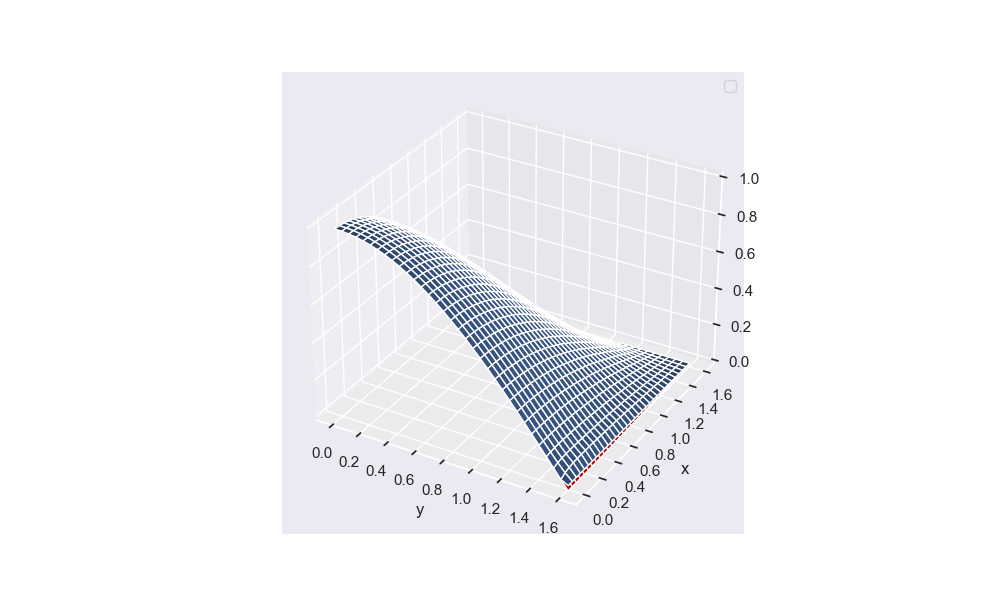

In [14]:
plot_surface(u_exact[:, :, 1], u_alternating[:, :, 1])

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


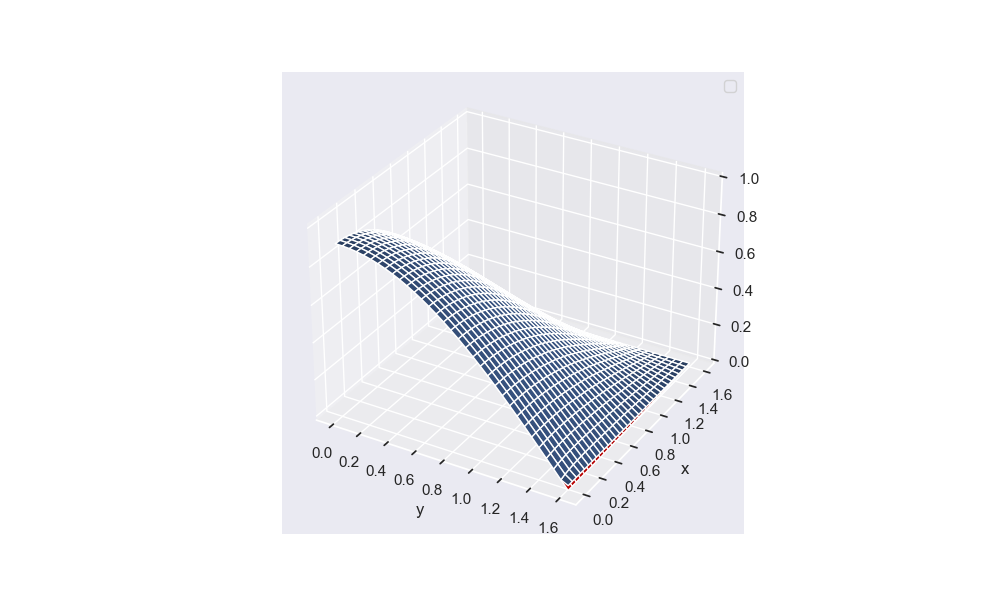

In [15]:
plot_surface(u_exact[:, :, 5], u_fractional[:, :, 5])

In [16]:
def print_errors():
    #mu_params = [(1, 1), (2, 1), (1, 2)]
    mu_params = [(1, 1)]
    for mu in mu_params:
        mu_1, mu_2 = mu[0], mu[1]
        print(f'mu1 = {mu_1}, mu2 = {mu_2} \n')
        u_exact = get_analytical_solution(x_begin, x_end, y_begin, y_end, t_begin, t_end, h_x, h_y, tau, mu_1, mu_2)

        u_alternating = alternating_directions_scheme(x_begin, x_end, y_begin, y_end, t_begin, t_end,
                                                      h_x, h_y, tau, mu_1, mu_2, a=1)

        print(f'alternating directions, max abs error = {np.max(abs(u_alternating - u_exact))}')
        print(f'alternating directions, mean abs error = {np.mean(abs(u_alternating - u_exact))} \n')

        u_fractional = fractional_steps_scheme(x_begin, x_end, y_begin, y_end, t_begin, t_end,
                                               h_x, h_y, tau, mu_1, mu_2, a=1)

        print(f'fractional steps, max abs error = {np.max(abs(u_fractional - u_exact))}')
        print(f'fractional steps, mean abs error = {np.mean(abs(u_fractional - u_exact))} \n')


In [17]:
print_errors()

mu1 = 1, mu2 = 1 

alternating directions, max abs error = 0.029199522301288815
alternating directions, mean abs error = 0.0022884356346231237 

fractional steps, max abs error = 0.02862133302091431
fractional steps, mean abs error = 0.0023677278088452356 



### Вывод

В данной лабораторной работе я научился решать двумерные начально-краевые задачи параболического типа.

Для решения я использовал два метода:

* метод переменных направлений
* метод дробных шагов

С помощью каждого метода мне удалось получить результат с хорошей точностью